 # Homework 2



 ## Your Name Here (or your names here if you are pair programming)



  - Student Name: Kyle Castillo

  - Student UT EID: kmc5794





  - Partner Name: Andre Sae

  - Partner UT EID: as226576



 ## Practicing Pandas



In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.options.display.max_rows = 50

# Enable inline mode for matplotlib so that Jupyter displays graphs
# %matplotlib inline

 # Social Network Dataset



 In this assignment we work with a social network dataset.



 You have 5 tables to work on.



 1. **person_knows_person**

 This table represents the friendship between users. A person can have many friends. Persons have unique integer id number.



 2. **person_likes_post_file**

 This tables represents user likes. A person and a post is represented by IDs.



 3. **post_hasCreator_person**

 A person creates many posts. Each post has a unique creator person id.



 4. **comment_replyOf_post**

 This table represents comments on posts. Both post and comments have unique ids.



 5. **comment_hasCreator_person**

 A user can comment on posts. Each comment has a unique creator person id.



In [2]:
url = "https://raw.githubusercontent.com/kiat/Elements-of-Data-Analytics/main/datasets/social-media/"

person_knows_person_file = url + "person_knows_person.csv"
person_likes_post_file = url + "person_likes_post.csv"
post_hasCreator_person_file = url + "post_hasCreator_person.csv"
comment_replyOf_post_file = url + "comment_replyOf_post.csv"
comment_hasCreator_person_file = url + "comment_hasCreator_person.csv"

person_knows_person = pd.read_csv(person_knows_person_file, sep="|")
person_likes_post = pd.read_csv(person_likes_post_file, sep="|")
post_hasCreator_person = pd.read_csv(post_hasCreator_person_file, sep="|")
comment_replyOf_post = pd.read_csv(comment_replyOf_post_file, sep="|")
comment_hasCreator_person = pd.read_csv(comment_hasCreator_person_file, sep="|")

print(person_knows_person.head(5))
print("-------------------------")

print(person_likes_post.head(5))
print("-------------------------")

print(post_hasCreator_person.head(5))
print("-------------------------")

print(comment_replyOf_post.head(5))
print("-------------------------")

print(comment_hasCreator_person.head(5))
print("-------------------------")

   Person.id  Person.id.1
0         38          956
1         38          962
2         38          941
3         38           74
4         38           36
-------------------------
   Person.id  Post.id          creationDate
0         74        0  2012-10-15T05:13:41Z
1         36        0  2012-10-18T10:51:39Z
2        417       10  2012-11-18T11:14:47Z
3        415       10  2012-11-20T06:30:22Z
4        109       10  2012-11-19T11:03:52Z
-------------------------
   Post.id  Person.id
0        0         38
1       10         38
2       20         38
3       30         38
4       40         38
-------------------------
   Comment.id  Post.id
0           0        0
1          10        0
2          30        0
3          70        0
4         100       10
-------------------------
   Comment.id  Person.id
0           0         74
1          10        832
2          20        913
3          30        457
4          40        956
-------------------------


 # Question - 1. Who are the top-10 users who have the highest number of friends? (4 points)

 Count up the number of friends of each user and provide the top-10 of this number of friend count list. Print out their user IDs.

In [9]:
# convert df to numpy in order to sort pairs
pkp_numpy = person_knows_person.to_numpy()
pkp_numpy.sort()

# renames columns for clarity
# drops duplicate pairs
pkp_renamed = pd.DataFrame(pkp_numpy).rename(columns={0: "smaller_id", 1: "larger_id"})
pkp_dropped = pkp_renamed.drop_duplicates()

# create blank series to add smaller_id and larger_id
blank_series = pd.Series(index=np.arange(0, 1000), data=np.zeros(1000))

# adds blank series to smaller_id users and adds it to the sum of larger_id users and blank series
pkp_total_friend_count = (
    pkp_dropped["smaller_id"].value_counts() + blank_series
).fillna(0) + (pkp_dropped["larger_id"].value_counts() + blank_series).fillna(0)

# formats into df to giver data structure columnnames
pkp_total_friend_count_df = (
    pd.DataFrame(pkp_total_friend_count.nlargest(10))
    .reset_index()
    .rename(columns={"index": "user", 0: "friends"})
)

print(pkp_total_friend_count_df)

   user  friends
0    40     99.0
1   336     99.0
2   959     99.0
3   296     98.0
4   430     98.0
5   811     98.0
6   938     98.0
7   165     97.0
8   804     97.0
9    23     96.0


 # Question - 2. Who wrote the most liked post?  (4 points)

 Count up the number of likes for each post and find out who wrote that post.

 Print out the user id. If there are multiple maximum print them all.

In [4]:
# groups by Post.id to count number of likes per post
# aggregates andselects only users with most likes
post_and_likes = pd.DataFrame(
    person_likes_post.groupby(["Post.id"])["Post.id"].count().nlargest(1, keep="all")
)

# merges to post_hasCreater_person in order to findthe user who madeeach post
merged_likes_and_people = post_hasCreator_person.merge(
    post_and_likes, left_on="Post.id", right_index=True
)["Person.id"]
people_with_most_likes = merged_likes_and_people.unique()

print(people_with_most_likes)

[ 38 941 347 495 884 336 405 135 587 863  43 875 861 422 514 746 728 548
 825 402 109 557  72 627 790 463 838  65 357  52 427 193 629 232 186 197
 585 429  28 732 318 635 393 654 105 659 189 643 668 556 383 532 326 970
 717 900 910 239 524 396 224 795 262  91 711 348 153 663 996 473 415 842
 762  86 731 919 685 505 353 965 712 945 564 122 959 997  36 510 278 675
  13 275 568 221  73 669 408 483 844 517 544 118  48 370 976 609 156 102
 333 770 569 630 451 542 911 430  83 979 896 297 394 182 828 882 878 529
 819   3 149  78 319 180 683 938 951   5 434 572 157 886 785 613 229 980
 778   4 476 491  11 715 942 280 835 986 661 834 545 780 674 858 876 658
 464 929 960 325 618 888 693 921 694 983 696 179 406 225  55 958 167 991
 767 250 480 899  21 943 772 166 987 786 565 366  99  71 814 446 745 699
 998 892 648  66 531 632 738  53  22 550 571 716 131 395 647 420 168 101
 344  31 908 640 651 682 973  64 266 417 426 274 570 191 680  41 155 859
 649 913 702  10 230 477 369 334 773 414 538 620 66

 # Question - 3. Who wrote the most influential post? The most influential post is the most discussed and most liked post. (4 points)



 **Tip:** First, count up the number of comments and likes that each post has. Then find out which post it is, and finally find out who wrote that.

 Print out one user id.

 If there is a tie, print out the ***one***  at the tope of the list.



In [5]:
# counts numberof likes per post
post_and_likes = pd.DataFrame(
    person_likes_post.groupby(["Post.id"])["Post.id"].count()
).rename(columns={"Post.id": "likes"})

# counts number of comments per post
post_and_comments = pd.DataFrame(
    comment_replyOf_post.groupby(["Post.id"])["Post.id"].count()
).rename(columns={"Post.id": "comments"})

# merges both dataframes together
# calculates new column based on sum of comments and likes per post
post_likes_comments = post_and_likes.merge(
    post_and_comments, left_index=True, right_index=True
)
post_likes_comments["total"] = (
    post_likes_comments["likes"] + post_likes_comments["comments"]
)

# finds post with most likes and comments
post_most_engagement = post_likes_comments.nlargest(1, "total")

# merges to post_hasCreator_prson to find person who made the post
print(
    post_most_engagement.merge(
        post_hasCreator_person, left_index=True, right_on="Post.id"
    )[["Person.id"]]
)


       Person.id
51882        325


 # Question - 4. Create two histograms for the distributions of the number of likes and comments that users have created. (4 points)

 Describe the shape of these data two data distributions.



 **Tip:** First perpare two lists of number of likes and number of comments that users have done. You need to count up how many likes and how many comments each unique user id has.

array([[<Axes: title={'center': 'likes_created'}>]], dtype=object)

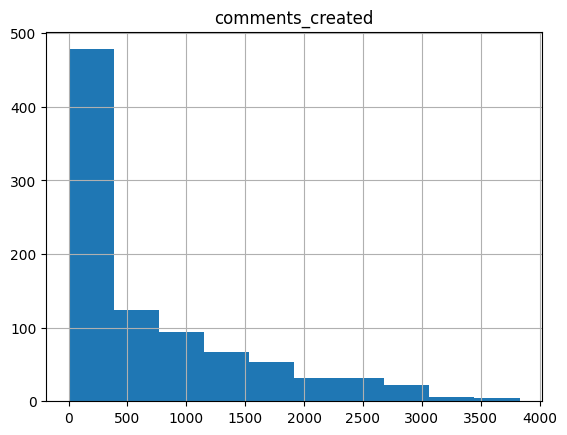

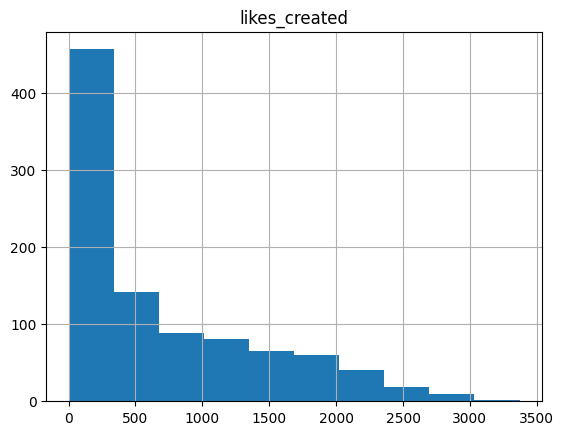

In [6]:
# dataframe that counts how many comments each user leaves
# renames columns for convenience
comments_user_count = pd.DataFrame(
    (comment_hasCreator_person.groupby("Person.id")["Person.id"].count())
).rename(columns={"Person.id": "comments_created"})

# dataframe that counts how manycomments each person left
# renames columns
likes_user_count = pd.DataFrame(
    (person_likes_post.groupby("Person.id")["Person.id"].count())
).rename(columns={"Person.id": "likes_created"})

# plots
comments_user_count.hist()
likes_user_count.hist()

# the distribution of both histrograms are strongly right skewed

 # Question - 5. What is the Pearson correlation coefficient between the number of comments and the number of likes that users do on the social network? (4 points)



 Print out one number.







 **Tip:** You can calculate correlation coefficient using the following formula:

 Assume that x and y are two arrays of data, in this case number of likes and comments of each user. n is the number of users.



 **Bonus Tip:** Consider that some users might have liked posts, but not liked any comments, or vice versa.



 You can use whichever technique you would like for the question, as long as it has been discussed in lecture.









 \begin{align*}

 r= {{ n(\sum x y ) - (\sum x ) (\sum y)    } \over { \sqrt{ [ n \sum x^2  -

 (\sum x)^2 ] [ n\sum y^2 - (\sum y )^2 ] } } }

 \end{align*}





















In [7]:
# blank series to add comments per user and likes per user more conveniently
blank_series = pd.Series(index=np.arange(0, 1000), data=np.zeros(1000))

# counts comments per user and likes per user as a series
comments_user_count = (comments_user_count["comments_created"] + blank_series).fillna(0)
likes_user_count = (likes_user_count["likes_created"] + blank_series).fillna(0)

# create a dict to transform into df
comments_likes_dict = {
    "comments_created": comments_user_count,
    "likes_created": likes_user_count,
}
comments_likes_df = pd.DataFrame(comments_likes_dict)

In [8]:
# x: likes per user
# y: comments per user
# n: number of users

# creates deep copy
correlation_df = comments_likes_df.copy()

# calculuates number of rows
# renames columns to fit to the formula
n = len(comments_likes_df)
correlation_df = correlation_df.rename(
    columns={"comments_created": "x", "likes_created": "y"}
)

# math stuff
correlation_df["xy"] = correlation_df["x"] * correlation_df["y"]

sum_xy = correlation_df["xy"].sum()

sum_x = correlation_df["x"].sum()
sum_y = correlation_df["y"].sum()

sum_x_squared = (correlation_df["x"] ** 2).sum()
sum_x_whole_squared = sum_x**2

sum_y_squared = (correlation_df["y"] ** 2).sum()
sum_y_whole_squared = sum_y**2

numerator = (n * sum_xy) - (sum_x * sum_y)
denominator = np.sqrt(
    ((n * sum_x_squared) - sum_x_whole_squared)
    * ((n * sum_y_squared) - sum_y_whole_squared)
)

corr = numerator / denominator
print(corr)

0.9257650670138979
